In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

In [67]:
#carga de informacion
df = pd.read_csv('../bank.csv')
print(df.dtypes)
print(df.head())

#conversion de data para trabajar mejor el data set
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
#de interes deposit

# print(df.dtypes)
print('****'*25)
print(df['deposit'].value_counts())
print('****'*25)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      146

In [68]:
# Revision de valores null
print(df.isnull().sum().sort_values(ascending = False))
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
#df['deposit'] = df['poutcome'].astype('category')
print("******"*20)
print(df['deposit'].value_counts())
print(df.dtypes)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
************************************************************************************************************************
deposit
0    5873
1    5289
Name: count, dtype: int64
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
deposit         int64
dtype: object


In [69]:
#division de data para entranamiento y pruebas
# Codificar variables categóricas (One-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

#Separar variables y etiquetas
X = df_encoded.drop(columns='deposit')
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
train_df = X_train.copy()
train_df['deposit'] = y_train

majority = train_df[train_df.deposit == 0]
minority = train_df[train_df.deposit == 1]

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)
train_balanced = pd.concat([majority, minority_upsampled])
#Revision de Data valanciada
print(train_balanced['deposit'].value_counts())
###
train_balanced = pd.concat([majority, minority_upsampled])
train_balanced['deposit'] = train_balanced['deposit'].astype('category')
X_train_bal = train_balanced.drop(columns='deposit')
y_train_bal = train_balanced['deposit']


deposit
0    4111
1    4111
Name: count, dtype: int64


print("Valores nulos en X_train_bal:")
print(X_train_bal.isnull().sum())

# Verificar valores nulos en la variable objetivo
print("\nValores nulos en y_train_bal:")
print(y_train_bal.isnull().sum())

In [70]:
#Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


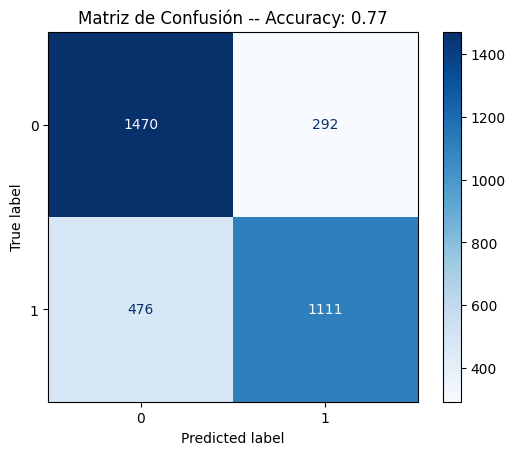

In [71]:
y_pred = model.predict(X_test)
#Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
#Mostrar la matriz gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusión -- Accuracy: {acc:.2f}")
plt.grid(False)
plt.show()
#Mostrar accuracy
acc = accuracy_score(y_test, y_pred)

In [72]:
# Definir KFold con K=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar usando accuracy como métrica
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Mostrar resultados
print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", np.mean(scores))

Accuracy en cada fold: [0.78952082 0.79579042 0.80062724 0.77464158 0.79166667]
Accuracy promedio: 0.7904493448709243


In [73]:
f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
precision = cross_val_score(model, X, y, cv=5, scoring='precision')

print("F1 promedio:", f1.mean())
print("Precisión promedio:", precision.mean())

F1 promedio: 0.7149074766072671
Precisión promedio: 0.752733183187725
